## 1. Time Series Classification Part 1: Feature Creation/Extraction

An interesting task in machine learning is the classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.


### (a) Download the AReM data
[Download AReM Data](https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29)  
The dataset contains 7 folders representing seven types of activities. In each folder, there are multiple files representing an instant of a human performing an activity.  
Each file contains 6 time series collected from the activities of the same person, called `avg rss12`, `var rss12`, `avg rss13`, `var rss13`, `avg rss23`, and `ar rss23`. There are 88 instances in the dataset, each containing 6 time series, with each time series having 480 consecutive values.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

### (b) Test and Train Split
Keep datasets 1 and 2 in the folders `bending1` and `bending2`, as well as datasets 1, 2, and 3 in other folders as test data. Use the remaining datasets as train data.


In [2]:
def load_data(foldername, num_tests):
    filepath = f'../data/AReM/{foldername}'
    column_name = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
    dataset_name = [file for file in os.listdir(filepath) if file.endswith('.csv')]
    training_data, testing_data = [], []
    for i, data in enumerate(dataset_name):
        df = pd.read_csv(f'{filepath}/{data}', skiprows=5, names=column_name, index_col=False)
        if i < num_tests:
            testing_data.append(df)
        else:
            training_data.append(df)
    training_data = pd.concat(training_data, ignore_index=True)
    testing_data = pd.concat(testing_data, ignore_index=True)    
    return training_data, testing_data

In [3]:
# test function
df = load_data('bending1', 2)
print(df[1], df[0])

       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      42.00       0.00      18.50       0.50      12.00       0.00
1       250      42.00       0.00      18.00       0.00      11.33       0.94
2       500      42.75       0.43      16.75       1.79      18.25       0.43
3       750      42.50       0.50      16.75       0.83      19.00       1.22
4      1000      43.00       0.82      16.25       0.83      18.00       0.00
..      ...        ...        ...        ...        ...        ...        ...
955  118750      43.50       0.50      14.50       1.12      22.50       0.87
956  119000      44.00       0.00      18.00       0.71      22.25       1.09
957  119250      44.25       0.83      16.50       2.29      23.25       1.30
958  119500      42.50       0.87      13.50       1.50      16.25       3.11
959  119750      41.50       0.50      15.25       1.79      13.00       1.22

[960 rows x 7 columns]         time  avg_rss12  var_rss12  avg_

**Already fixed the csv file format issue, don't need to run the code below again.**

In [4]:
# column_name = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
# df = pd.read_csv('../data/AReM/bending2/dataset4.csv', delimiter=' ', engine='python', skiprows=5, names= column_name, index_col=False)
# print(df)
# df.to_csv('../data/AReM/bending2/dataset4.csv', index=False)


In [5]:
folders = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
num_tests = [2, 2, 3, 3, 3, 3, 3]

training_data, testing_data = [], []
for folder, num_test in zip(folders, num_tests):
    training, testing = load_data(folder, num_test)
    # print(f"Folder: {folder}, Training: {training}, Testing: {testing}")
    training_data.append(training)
    testing_data.append(testing) 

training_data = pd.concat(training_data, ignore_index=True)
testing_data = pd.concat(testing_data, ignore_index=True)   

print("Training Data: \n", training_data)
print("Testing Data: \n", testing_data)

Training Data: 
          time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      47.33       0.47      28.00       0.82      34.25   
1         250      47.50       0.50      29.00       1.22      36.00   
2         500      47.50       0.50      30.00       0.00      36.75   
3         750      47.00       0.71      28.00       1.22      37.00   
4        1000      45.00       0.71      24.25       1.79      36.00   
...       ...        ...        ...        ...        ...        ...   
33114  118750      31.50       1.66      12.50       3.20      14.25   
33115  119000      27.33       1.25      11.33       0.94      20.00   
33116  119250      37.80       7.68      14.20       2.48      17.25   
33117  119500      33.75       1.30      15.75       5.21      16.50   
33118  119750      32.67       3.09      18.67       0.47      14.00   

       var_rss23  
0           1.30  
1           0.00  
2           0.83  
3           1.22  
4           0.00  
... 

### (c) Feature Extraction

**i. Research time-domain features**  
Research the types of time-domain features usually used in time series classification. Examples include minimum, maximum, mean, etc.

**ii. Extract Time-domain Features**  
Extract the time-domain features `minimum`, `maximum`, `mean`, `median`, `standard deviation`, `first quartile`, and `third quartile` for all 6 time series in each instance. You may normalize/standardize features or use them directly.  
Your new dataset will look like this:

| Instance | min₁ | max₁ | mean₁ | median₁ | ... | 1st quart₆ | 3rd quart₆ |
| -------- | ---- | ---- | ----- | ------- | --- | ---------- | ---------- |
| 1        |      |      |       |         |     |            |            |
| 2        |      |      |       |         |     |            |            |
| 3        |      |      |       |         |     |            |            |
| ...      | ...  | ...  | ...   | ...     | ... | ...        | ...        |
| 88       |      |      |       |         |     |            |            |

Where, for example, `1st quart₆` means the first quartile of the sixth time series in each of the 88 instances.

**iii. Estimate Standard Deviation and Build Confidence Interval**  
Estimate the standard deviation of each time-domain feature. Use Python's `bootstrapped` or another method to build a 90% bootstrap confidence interval for the standard deviation of each feature.

**iv. Select Three Important Features**  
Use your judgment to select the three most important time-domain features. One option could be `min`, `mean`, and `max`.


Time-domain Features:
- Mean, Median, Quartiles (1st, 3rd)
- Minimum, Maximum
- Standard deviation, Range
- Frequency of values above or below a threshold
- Skewness, Kurtosis
- Auto-correlation, Cross-correlation
- Moving average, Exponential Moving Average (EMA)


Reference: 
- https://stats.stackexchange.com/questions/50807/features-for-time-series-classification
- https://www.geeksforgeeks.org/feature-engineering-for-time-series-data-methods-and-applications/
- https://online.stat.psu.edu/stat510/lesson/1/1.1

In [6]:
def extract_features(data, num_instance, normalize=False):
    features = {'instance': num_instance} # instance number
    
    if normalize:
        data = (data - data.mean()) / data.std()
        
    for column in df.columns[1:]:
        features[f'min_{column}'] = data[column].min()
        features[f'max_{column}'] = data[column].max()
        features[f'mean_{column}'] = data[column].mean()
        features[f'median_{column}'] = data[column].median()
        features[f'std_{column}'] = data[column].std()
        features[f'1st_quart_{column}'] = data[column].quantile(0.25)
        features[f'3rd_quart_{column}'] = data[column].quantile(0.75)
    return pd.DataFrame(features, index=[0]) # return only one row for this instance

def read_data(file_path):
    column_name = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
    df = pd.read_csv(file_path, skiprows=5, names=column_name, index_col=False)
    return df

In [7]:
data_path = '../data/AReM'
num_instance = 0
time_domain_features = []

for folder in os.listdir(data_path):
    if folder.endswith('.pdf'):
        continue
    for file in os.listdir(f'{data_path}/{folder}'):
        num_instance += 1
        df = read_data(f'{data_path}/{folder}/{file}')
        features = extract_features(df, num_instance)
        time_domain_features.append(features)

time_domain_features = pd.concat(time_domain_features, ignore_index=True)
print(time_domain_features)

    instance  min_avg_rss12  max_avg_rss12  mean_avg_rss12  median_avg_rss12  \
0          1          36.25          48.00       43.969125             44.50   
1          2          37.00          48.00       43.454958             43.25   
2          3          33.00          47.75       42.179812             43.50   
3          4          33.00          45.75       41.678063             41.75   
4          5          37.25          45.00       40.624792             40.50   
..       ...            ...            ...             ...               ...   
83        84          18.50          44.25       35.752354             36.00   
84        85          24.25          45.00       37.177042             36.25   
85        86          23.33          43.50       36.244083             36.75   
86        87          26.25          44.25       36.957458             36.29   
87        88          27.75          44.67       37.144833             36.33   

    std_avg_rss12  1st_quart_avg_rss12 

**Check if there are missing values**

In [8]:
# for folder in os.listdir(data_path):
#     if folder.endswith('.pdf'):
#         continue
#     for file in os.listdir(f'{data_path}/{folder}'):
#         df = read_data(f'{data_path}/{folder}/{file}')
#         missing_values = df.isnull().any().any()
#         print(f'{folder}/{file}: {missing_values}')

**Extract features after normalization**

In [9]:
data_path = '../data/AReM'
num_instance = 0
time_domain_features_norm = []

for folder in os.listdir(data_path):
    if folder.endswith('.pdf'):
        continue
    for file in os.listdir(f'{data_path}/{folder}'):
        num_instance += 1
        df = read_data(f'{data_path}/{folder}/{file}')
        features = extract_features(df, num_instance, normalize=True)
        time_domain_features_norm.append(features)

time_domain_features_norm = pd.concat(time_domain_features_norm, ignore_index=True)
print(time_domain_features_norm)

    instance  min_avg_rss12  max_avg_rss12  mean_avg_rss12  median_avg_rss12  \
0          1      -4.769710       2.490710    1.095420e-15          0.328032   
1          2      -4.656928       3.279019   -2.930989e-15         -0.147867   
2          3      -2.500858       1.517487    7.697546e-16          0.359659   
3          4      -3.868108       1.815001   -1.273056e-15          0.032065   
4          5      -2.284947       2.962293   -1.036208e-16         -0.084492   
..       ...            ...            ...             ...               ...   
83        84      -3.738482       1.841389    7.790065e-16          0.053663   
84        85      -3.609594       2.184390   -2.701543e-16         -0.258856   
85        86      -3.378867       1.898453   -6.568820e-16          0.132369   
86        87      -3.117289       2.123096   -5.051515e-16         -0.194319   
87        88      -2.499354       2.001958    6.550316e-16         -0.216774   

    std_avg_rss12  1st_quart_avg_rss12 

In [10]:
features_std = time_domain_features.drop(columns=['instance']).std()
print(features_std)

min_avg_rss12          9.569975
max_avg_rss12          4.394362
mean_avg_rss12         5.336157
median_avg_rss12       5.440054
std_avg_rss12          1.772415
1st_quart_avg_rss12    6.153590
3rd_quart_avg_rss12    5.145600
min_var_rss12          0.000000
max_var_rss12          5.062729
mean_var_rss12         1.574181
median_var_rss12       1.412244
std_var_rss12          0.884102
1st_quart_var_rss12    0.946386
3rd_quart_var_rss12    2.125266
min_avg_rss13          2.956462
max_avg_rss13          4.875137
mean_avg_rss13         4.007220
median_avg_rss13       4.034331
std_avg_rss13          0.946872
1st_quart_avg_rss13    4.220658
3rd_quart_avg_rss13    4.171628
min_var_rss13          0.000000
max_var_rss13          2.183625
mean_var_rss13         1.166071
median_var_rss13       1.145586
std_var_rss13          0.458234
1st_quart_var_rss13    0.843620
3rd_quart_var_rss13    1.552504
min_avg_rss23          6.124001
max_avg_rss23          5.741238
mean_avg_rss23         5.675589
median_a

In [11]:
std_confidence_interval = {}
for column in time_domain_features.columns[1:]:
    feature = np.array(time_domain_features[column])
    bootstrap_results = bs.bootstrap(feature, stat_func=bs_stats.std, alpha=0.10)
    std_confidence_interval[column] = {
        'std': bootstrap_results.value,
        'lower_bound': bootstrap_results.lower_bound,
        'upper_bound': bootstrap_results.upper_bound
    }

std_confidence_interval = pd.DataFrame(std_confidence_interval).T 
print(std_confidence_interval)

                          std  lower_bound  upper_bound
min_avg_rss12        9.515445     8.319117    10.819707
max_avg_rss12        4.369322     3.473529     5.421503
mean_avg_rss12       5.305751     4.761581     5.932264
median_avg_rss12     5.409056     4.856146     6.057949
std_avg_rss12        1.762315     1.582733     1.960579
1st_quart_avg_rss12  6.118526     5.635247     6.688851
3rd_quart_avg_rss12  5.116280     4.409580     5.907104
min_var_rss12        0.000000     0.000000     0.000000
max_var_rss12        5.033882     4.692438     5.470882
mean_var_rss12       1.565211     1.437448     1.740724
median_var_rss12     1.404197     1.272580     1.576303
std_var_rss12        0.879064     0.823138     0.957023
1st_quart_var_rss12  0.940994     0.852387     1.058562
3rd_quart_var_rss12  2.113157     1.944824     2.339285
min_avg_rss13        2.939616     2.791684     3.140636
max_avg_rss13        4.847358     4.259245     5.549903
mean_avg_rss13       3.984387     3.500735     4

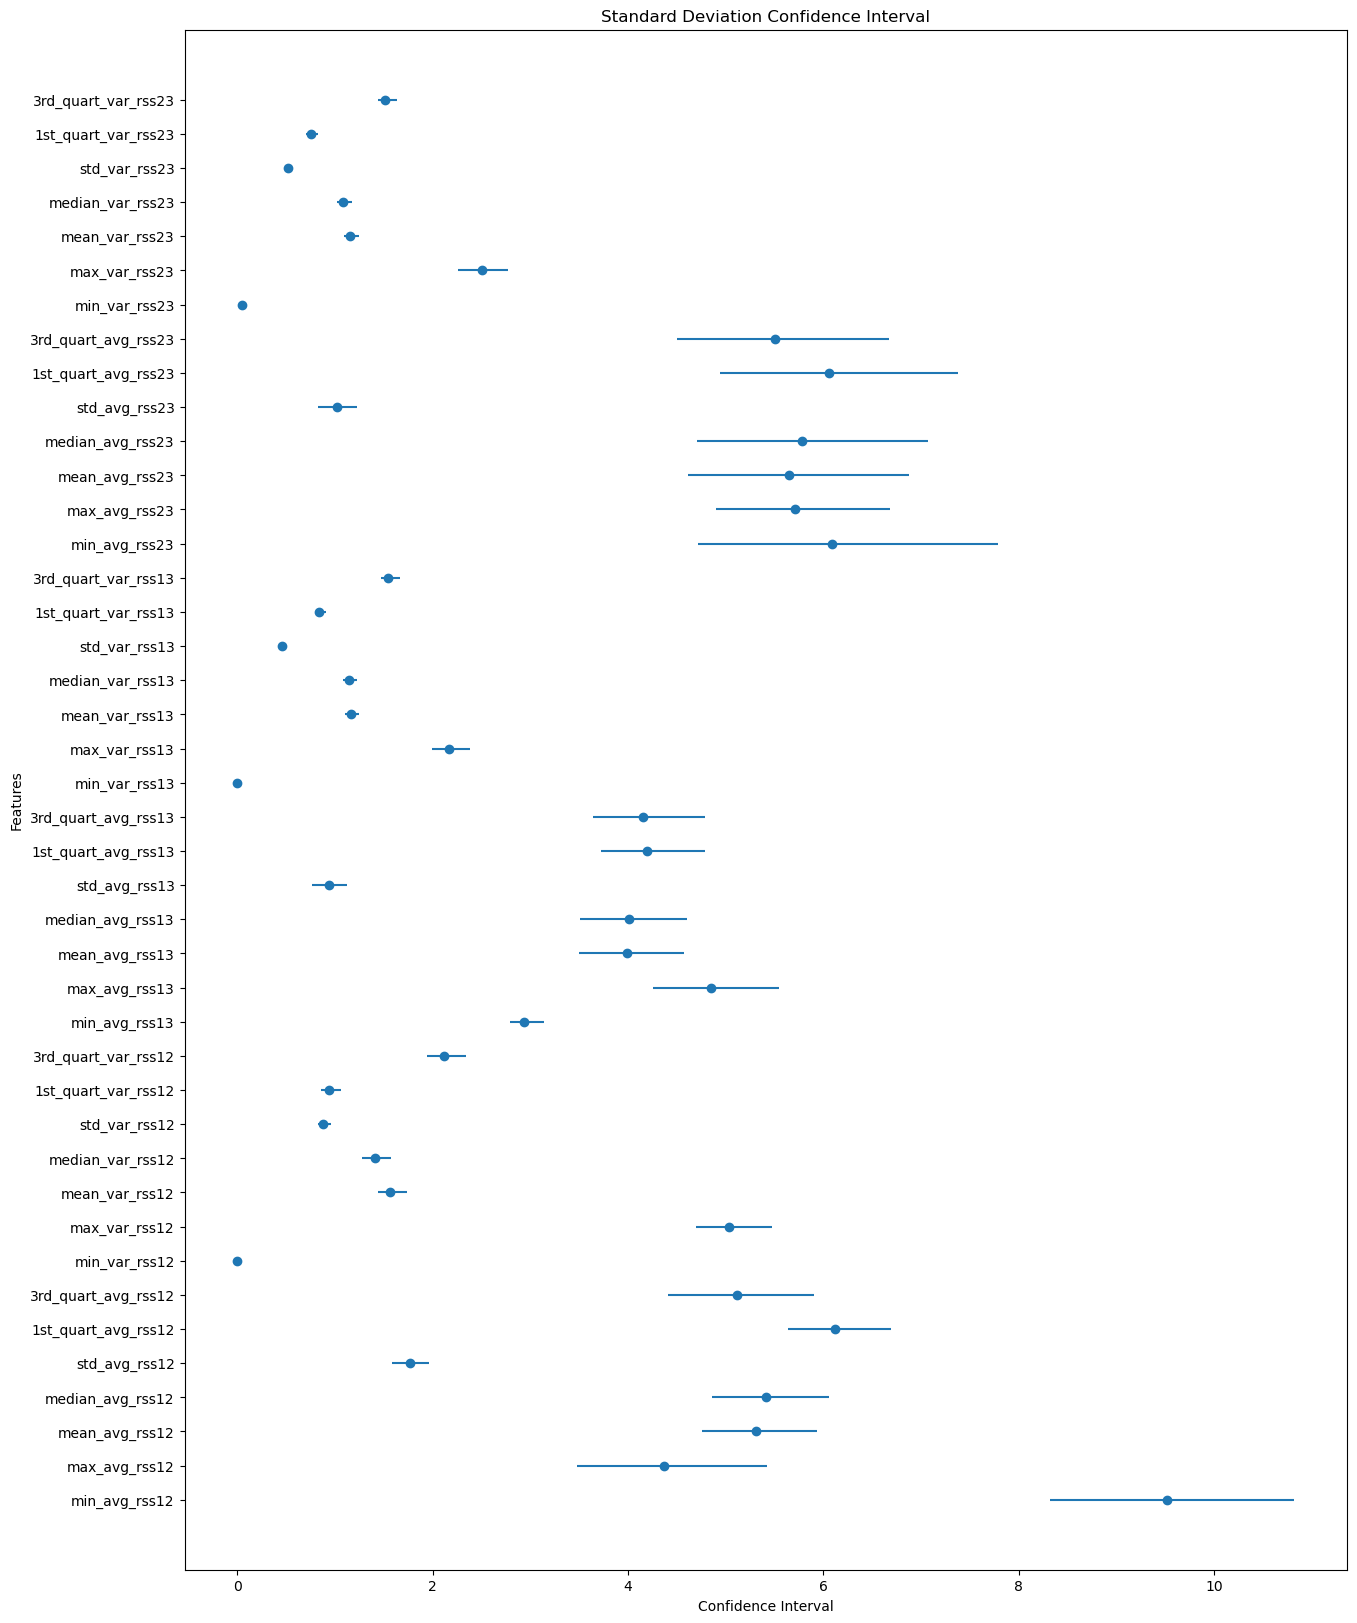

In [12]:
# plot the confidence interval
plt.figure(figsize=(15, 20))
plt.errorbar(x = std_confidence_interval['std'], y= std_confidence_interval.index,
            xerr = [std_confidence_interval['std'] - std_confidence_interval['lower_bound'],std_confidence_interval['upper_bound'] - std_confidence_interval['std']], fmt = 'o')
plt.xlabel('Confidence Interval')
plt.ylabel('Features')
plt.title('Standard Deviation Confidence Interval')
plt.show()

- standard deviation
- mean
- median

From the plot above, the confidence intervals of the standard deviation are usually small, which indicates that the standard deviation of the features is stable and will be a good feature.
Means and Medians also have small confidence intervals compare to other features, so they will be good features as well.
Maximums and minimums usually have large confidence intervals, which means they are not stable features, and some minimums are even close to zero, which may not be a good feature.

## 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. 

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
$$


#### (a) Suppose that the true relationship between X and Y is linear, i.e.
$$
 Y = \beta_0 + \beta_1 X + \epsilon
$$
#### Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.


Yes, we could expect the training RSS for the cubic regression to be lower than the linear regression because it has higher flexibility to fit all data points. At this point, when we calculate RSS, the cubic regression model will be closer to each data point, which results in a lower RSS value. But it will also lead to overfitting when we use the cubic regression model to predict new data points.

#### (b) Answer (a) using test rather than training RSS.

As my answer above, the cubic regression model will be easily overfitting especially when we have only one predictor, and the relationship is linear. Therefore, we can expect the test RSS for the cubic regression to be higher than the linear regression model.


#### (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

If the true relationship between X and Y is not linear, the cubic regression model can fit well to the data than linear regression model, and the training RSS from cubic model will definitely lower than linear model. However, we do not know how far the true relationship is from linear, so we cannot know which model will have lower testing RSS because the cubic regression model may overfit the data and have higher testing RSS.


#### (d) Answer (c) using test rather than training RSS.

As my answer above, there is not enough information to tell which model will have lower testing RSS. The cubic model has same problem as (a), (b) that it may overfit the data and have higher testing RSS. If the true relationship is very far from linear, we can expect the cubic model may have lower testing RSS than linear model.